In [1]:
#Rachel Xing
#Data Assignment for Pocket Gem
import pandas as pd

In [184]:
df_purchase = pd.read_csv("PM_InAppPurchase.csv")
df_user = pd.read_csv("PM_User_Sessions.csv")

In [3]:
len(df_purchase), len(df_user)

(4621, 160067)

In [4]:
df_purchase.isnull().sum()

date                    0
User ID Hash            0
Purchases on Date       0
Unnamed: 3           4621
Unnamed: 4           4621
dtype: int64

In [185]:
df_purchase = df_purchase[["date", "User ID Hash", "Purchases on Date"]]

In [6]:
df_user.isnull().sum()

User ID Hash    0
Session date    0
Install_date    0
Device_type     0
Country         1
dtype: int64

# User History Analysis 

In [7]:
df_user.sample(5)

,User ID Hash,Session date,Install_date,Device_type,Country
62237,9094284348a24fb090dfb9b8052135aa,1-Mar-18,23-Dec-17,iPhone7Plus,TW
57396,773e7c009b4244b892274cbd396a3216,14-Jan-18,14-Jan-18,iPad6,US
8413,28d048445f574c66943b926b5802ff58,25-Feb-18,22-Feb-18,iPhone5S,PH
91507,818c0d84e3924f338add19f85183f50b,18-Feb-18,18-Feb-18,iPhone6Plus,US
98519,241f2b1636b34e07846ab949c6af1fea,19-Jan-18,30-Dec-17,iPhone10,US


In [8]:
df_user.nunique()

User ID Hash    31101
Session date      135
Install_date      135
Device_type        26
Country           149
dtype: int64

In [9]:
#convert session date and install date to timestamp
df_user["Session date"] = pd.to_datetime(df_user["Session date"]
                                         , infer_datetime_format=True)  

df_user["Install_date"] = pd.to_datetime(df_user["Install_date"]
                                         , infer_datetime_format=True)  

In [10]:
#sort data by user id and session date
df_user = df_user.sort_values(by = ["User ID Hash", "Session date"])
df_user.head(5)

,User ID Hash,Session date,Install_date,Device_type,Country
112854,0002396cd5fd48ac8ea256c6bdb0635f,2017-11-03,2017-11-03,iPhone7Plus,VN
116352,0002396cd5fd48ac8ea256c6bdb0635f,2017-11-05,2017-11-03,iPhone7Plus,VN
94009,0002396cd5fd48ac8ea256c6bdb0635f,2017-11-06,2017-11-03,iPhone7Plus,VN
129069,0002396cd5fd48ac8ea256c6bdb0635f,2017-11-07,2017-11-03,iPhone7Plus,VN
134884,0002396cd5fd48ac8ea256c6bdb0635f,2017-11-08,2017-11-03,iPhone7Plus,VN


In [14]:
#create a new variable for first play date
df_first_play = df_user.groupby("User ID Hash")["Session date"].min().reset_index()

In [15]:
df_first_play.head()

,User ID Hash,Session date
0,0002396cd5fd48ac8ea256c6bdb0635f,2017-11-03
1,000581ac53f34e6f92312e9a5d6d7459,2018-02-05
2,000c870591d84419b0462df24d99a3e2,2018-02-14
3,000d63ff90be45f28b4fd22cbbe00a96,2018-01-29
4,000e02c295824b30bee4d2385085e91c,2017-12-31


In [16]:
df_first_play = df_first_play.rename(
    columns={"User ID Hash": "User ID Hash", "Session date": "First Session date"})

In [17]:
df_first_play.head()

,User ID Hash,First Session date
0,0002396cd5fd48ac8ea256c6bdb0635f,2017-11-03
1,000581ac53f34e6f92312e9a5d6d7459,2018-02-05
2,000c870591d84419b0462df24d99a3e2,2018-02-14
3,000d63ff90be45f28b4fd22cbbe00a96,2018-01-29
4,000e02c295824b30bee4d2385085e91c,2017-12-31


In [18]:
df_user = df_user.merge(df_first_play, on = "User ID Hash", how = "left")

In [19]:
#check lengthof data 
len(df_user)

160067

In [23]:
#check missing values
df_user.isnull().sum()

User ID Hash          0
Session date          0
Install_date          0
Device_type           0
Country               1
First Session date    0
dtype: int64

In [45]:
#check period length between install data and first play data 
df_first_play = df_user[df_user["Session date"] == df_user["First Session date"]]

In [46]:
df_first_play.head()

,User ID Hash,Session date,Install_date,Device_type,Country,First Session date
0,0002396cd5fd48ac8ea256c6bdb0635f,2017-11-03,2017-11-03,iPhone7Plus,VN,2017-11-03
9,000581ac53f34e6f92312e9a5d6d7459,2018-02-05,2018-02-05,iPhone7,CA,2018-02-05
13,000c870591d84419b0462df24d99a3e2,2018-02-14,2018-02-14,iPhone6SPlus,VN,2018-02-14
34,000d63ff90be45f28b4fd22cbbe00a96,2018-01-29,2018-01-29,iPadMRetina,US,2018-01-29
40,000e02c295824b30bee4d2385085e91c,2017-12-31,2017-12-31,iPhone10,US,2017-12-31


In [49]:
df_first_play["waiting_time"] = (df_first_play["First Session date"] - df_first_play["Install_date"]).dt.days



/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
df_first_play["waiting_time"].unique()

array([ 0,  2,  1,  4, 29])

In [51]:
#This showes that almost all users started to play the game as soon as they downloaded
#this is a good sign.
df_first_play[df_first_play["waiting_time"]>0]

,User ID Hash,Session date,Install_date,Device_type,Country,First Session date,waiting_time
4312,06328fb87ff0476da7be674446d37c48,2018-02-23,2018-02-21,iPhone10,FR,2018-02-23,2
9850,0e2ab8f2a58d4690867383a5da2592e5,2017-12-11,2017-12-09,iPhone7Plus,GB,2017-12-11,2
17378,1957a085269a42f79476ade0d2099d3f,2018-02-16,2018-02-14,iPad6,RS,2018-02-16,2
23707,2402d3c794134ee982f0f214c1388f4b,2018-01-25,2018-01-24,iPhone7,IT,2018-01-25,1
38919,3be2f484a14d4ef2aeefbef4692c6018,2017-11-11,2017-11-09,iPhone6Plus,US,2017-11-11,2
75191,76403e49aea94d9da6da4a45be184f0a,2017-12-03,2017-11-29,iPad6,CA,2017-12-03,4
119464,bdb9010cec6c457989f5b692255961ad,2017-12-31,2017-12-02,iPhone10,CA,2017-12-31,29


In [65]:
#number of users only have tried this game once and then stopped playing 
df_one_time_users = df_user.groupby("User ID Hash")["Session date"].count().reset_index()
df_one_time_users = df_one_time_users[df_one_time_users["Session date"]<2]

In [73]:
print("The number of total users:", len(df_user["User ID Hash"].unique()))
print("The number of one-time users:", len(df_one_time_users))
print("There are", (len(df_one_time_users["User ID Hash"].unique())/len(df_user["User ID Hash"].unique()))*100, "% of users stopped playing after the first try")

The number of total users: 31101
The number of one-time users: 16815
There are 54.06578566605575 % of users stopped playing after the first try


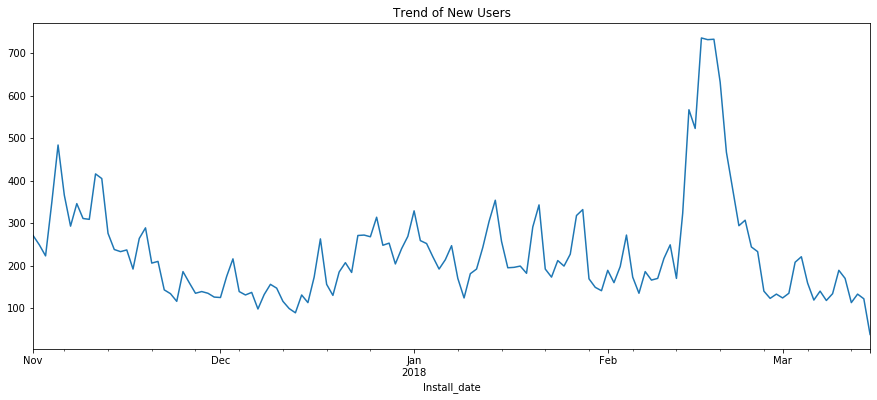

In [132]:
df_first_play.groupby("Install_date")["User ID Hash"].count().plot(figsize = (15,6), 
                                                                   title = "Trend of New Users")

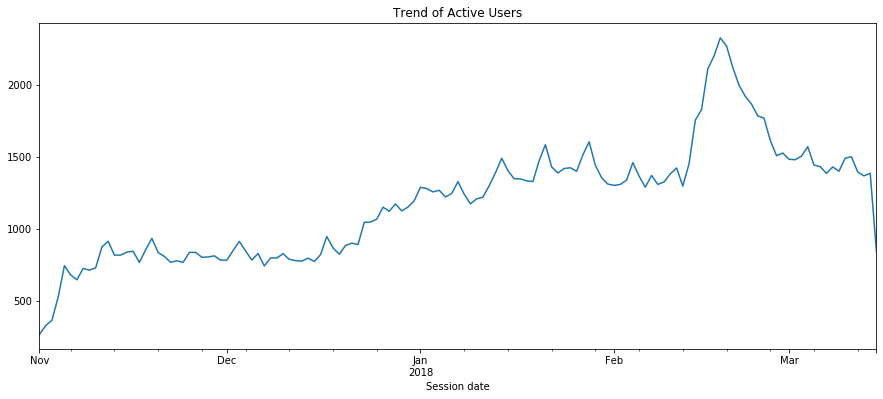

In [131]:
df_user.groupby("Session date")["User ID Hash"].count().plot(figsize = (15,6), 
                                                                   title = "Trend of Active Users")




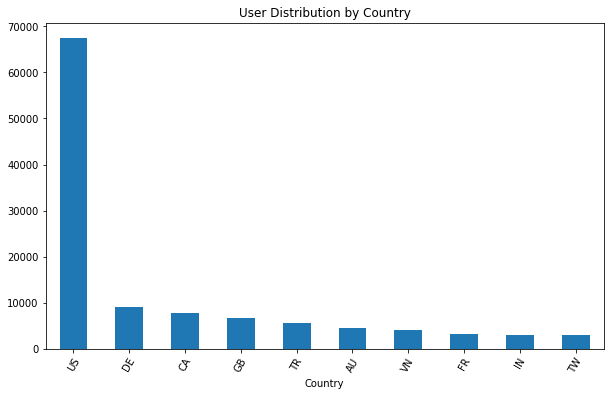

In [105]:
df_user.groupby("Country")["User ID Hash"].count().sort_values(
    ascending = False)[:10].plot(kind = "bar", rot = 60, figsize = (10,6), 
                            title = "Top 10 User Distribution by Country")

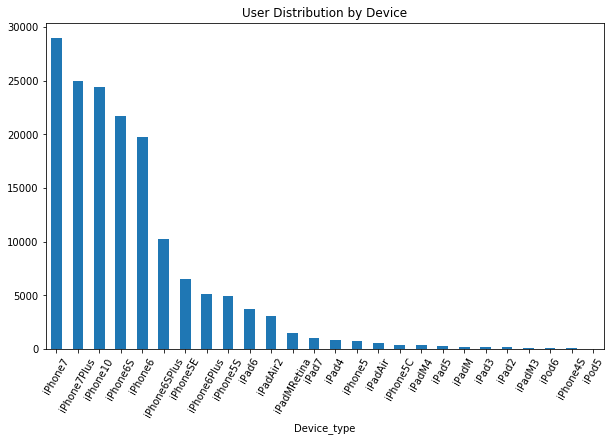

In [106]:
df_user.groupby("Device_type")["User ID Hash"].count().sort_values(
    ascending = False).plot(kind = "bar", rot = 60, figsize = (10,6),
                           title = "User Distribution by Device")

# Purchase History Analysis 

In [186]:
df_purchase.sample(5)

,date,User ID Hash,Purchases on Date
2645,21-Feb-18,dda7f173e18e4fe982b4ae5214f38457,$11.90
1495,26-Jan-18,b722afc2822b47ff989f78cc0eabe2df,$1.40
4571,10-Jan-18,589a815195c545e18d7b365a84b9c77e,$0.70
1737,28-Feb-18,d267a547ce1e4ee7820486270cc6a174,$1.40
2617,21-Feb-18,c572125617094fd1b03f54aa50695833,$3.50


In [187]:
df_purchase["date"] = pd.to_datetime(df_purchase["date"]
                                         , infer_datetime_format=True)  

In [188]:
df_purchase['Purchases on Date'] = df_purchase['Purchases on Date'].str.replace('$', '')
df_purchase["dollar_value"] = df_purchase["Purchases on Date"].astype('float')

In [189]:
#1.average purchase amount for Users with purchase history
df_purchase_total = df_purchase.groupby("User ID Hash")["dollar_value"].sum().reset_index()

In [190]:
print("Average user purchases is", "$", df_purchase_total.dollar_value.mean())

Average user purchases is $ 37.21514736120623


In [191]:
print("Total number of unique user id is:",  
      len(df_user["User ID Hash"].unique()))
print("Total number of user has purchase history is:", 
      len(df_purchase["User ID Hash"].unique()))
print("Percentage of User that has made puchases is:", 
      len(df_purchase["User ID Hash"].unique())/len(df_user["User ID Hash"].unique()))

Total number of unique user id is: 31101
Total number of user has purchase history is: 1459
Percentage of User that has made puchases is: 0.04691167486575994


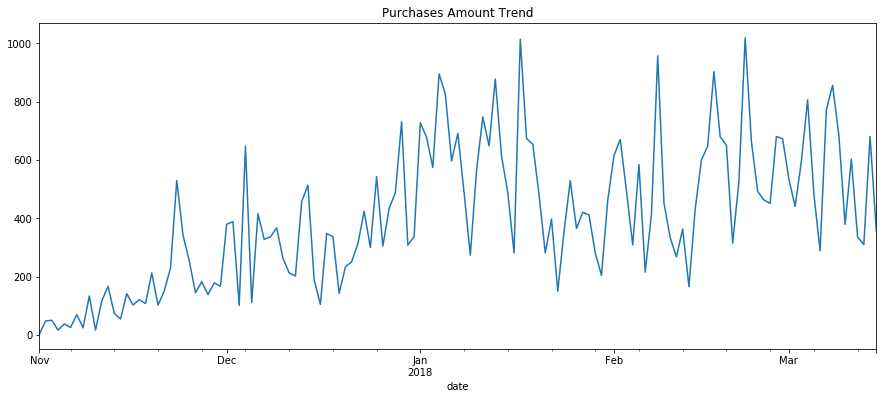

In [192]:
df_purchase.groupby("date")["dollar_value"].sum().plot(
    figsize = (15, 6), title = "Purchases Amount Trend")

In [195]:
df_purchase_date = df_purchase.groupby("date")["dollor_value"].sum().sort_values().reset_index()
                                               

In [196]:
df_purchase_date.head()

,date,dollar_value
0,2017-11-01,2.1
1,2017-11-04,16.8
2,2017-11-10,16.8
3,2017-11-08,24.5
4,2017-11-06,25.9


In [226]:
df_purchase_date["dayofweek"] = df_purchase_date[df_purchase_date["dollar_value"]>300]["date"].dt.dayofweek

In [227]:
df_purchase_date.groupby('dayofweek').count()

,date,dollar_value
dayofweek,,
0.0,13,13
1.0,5,5
2.0,14,14
3.0,15,15
4.0,15,15
5.0,14,14
6.0,11,11


In [139]:
df_first_purchase = df_purchase.groupby("User ID Hash")["date"].min().reset_index()

In [142]:
df_first_purchase = df_first_purchase.rename(
    columns={"User ID Hash": "User ID Hash", "date": "First Purchase date"})

In [143]:
df_first_purchase.head(5)

,User ID Hash,First Purchase date
0,008d5d28b11740ec8b26fd382211a47b,2018-01-02
1,0095fbe3339d4a60985e264abbfa7c62,2018-03-14
2,00c2231ea0204d369f20c262e52535ea,2018-02-25
3,012f31dbeb0441a9b88cb6987e21f45b,2017-11-12
4,015f03d7ab3b437eb630e1516c4fec95,2018-01-03


# Merge two tables

In [144]:
df_all = df_first_purchase.merge(df_first_play, on = "User ID Hash", how = "outer")

In [146]:
df_all.isnull().sum()

User ID Hash               0
First Purchase date    29649
Session date               0
Install_date               0
Device_type                0
Country                    1
First Session date         0
waiting_time               0
dtype: int64

In [150]:
df_all["purchase_waiting_time"] = (df_all["First Purchase date"] - df_all["First Session date"]).dt.days

In [154]:
df_all["purchase_waiting_time"].mean()

6.015006821282401

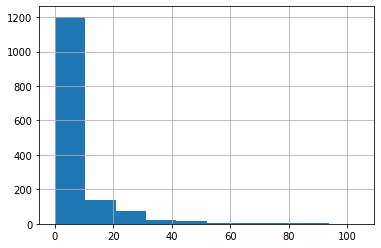

In [155]:
df_all["purchase_waiting_time"].hist()

In [156]:
df_purchase_all = df_purchase.merge(df_user, on = "User ID Hash", how = "left")

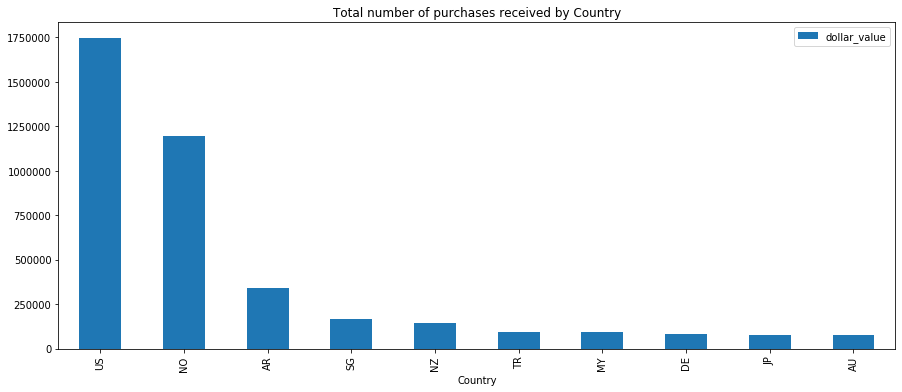

In [170]:
df_purchase_all[["Country", "dollar_value"]].groupby("Country").sum().sort_values(by= "dollar_value", 
                                                                                  ascending = False).round(3)[:10].plot(kind ="bar", figsize = (15,6), title = "Total number of purchases received by Country")